In [20]:
import tensorflow as tf
import pandas as pd
import sklearn
import PIL
import psutil
import fastapi
import uvicorn
import pydantic

print("Kütüphane kurulumları başarılı!")

Kütüphane kurulumları başarılı!


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(
    Conv2D( # 1st layer
        filters=32, # filtre sayısı yani resimdeki özellik sayısı
        kernel_size=(3, 3), # filtre boyutu
        activation='relu', # aktivasyon fonksiyonu
        input_shape=(240, 240, 3) # giriş şekli 3 kanallı 240x240 piksel resim (RGB) eğer siyah beyaz olsaydı 1 olacaktı
    ))

model.add(
    MaxPooling2D( # 2nd layer
        pool_size=(2, 2) # max pooling boyutu
    ))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # 3rd layer
model.add(MaxPooling2D(pool_size=(2, 2))) # 4th layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu')) # 5th layer

model.add(Flatten()) # düzleştirme
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5)) # overfitting önlemek için dropout
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid')) # çıkış katmanı

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 119, 119, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 58, 58, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 flatten_3 (Flatten)         (None, 401408)           

In [23]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path='data'


train_datagen = ImageDataGenerator(
    rescale=1./255, # resim değerlerini 0-1 arasına çekme
    shear_range=0.2, # kesme açısı
    zoom_range=0.2, # yakınlaştırma
    horizontal_flip=True # yatay çevirme
)

test_datagen = ImageDataGenerator(
    rescale=1./255, # resim değerlerini 0-1 arasına çekme
    validation_split = 0.2 # doğrulama verisi oranı
)

train_generator = train_datagen.flow_from_directory(
    data_path, # veri yolu
    target_size=(240, 240), # resim boyutu
    batch_size = 32, # her seferinde kaç resim alınacağı
    subset='training', # eğitim verisi
    class_mode='binary' # sınıflandırma türü
)

validation_generator = test_datagen.flow_from_directory(
    data_path,
    target_size=(240, 240),
    batch_size=32,
    subset='validation', # doğrulama verisi
    class_mode='binary'
)

Found 488 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [35]:
history=model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
16/16 [==============================] - 25s 2s/step - loss: 0.2426 - accuracy: 0.8893 - val_loss: 0.1355 - val_accuracy: 0.9375
Epoch 2/10
16/16 [==============================] - 25s 2s/step - loss: 0.2482 - accuracy: 0.9016 - val_loss: 0.1179 - val_accuracy: 0.9479
Epoch 3/10
16/16 [==============================] - 24s 1s/step - loss: 0.2606 - accuracy: 0.9016 - val_loss: 0.1283 - val_accuracy: 0.9375
Epoch 4/10
16/16 [==============================] - 24s 1s/step - loss: 0.2468 - accuracy: 0.8934 - val_loss: 0.1341 - val_accuracy: 0.9479
Epoch 5/10
16/16 [==============================] - 24s 2s/step - loss: 0.2149 - accuracy: 0.9078 - val_loss: 0.1574 - val_accuracy: 0.9375
Epoch 6/10
16/16 [==============================] - 24s 1s/step - loss: 0.3056 - accuracy: 0.8750 - val_loss: 0.1422 - val_accuracy: 0.9583
Epoch 7/10
16/16 [==============================] - 25s 2s/step - loss: 0.2158 - accuracy: 0.9201 - val_loss: 0.1073 - val_accuracy: 0.9688
Epoch 8/10
16/16 [==

In [36]:
model.save('models/adidas-nike.h5')

d:\wtech\wtech_ai_cnn\deep_learning\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


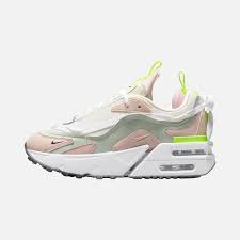

In [92]:
from tensorflow.keras.models import load_model
model = load_model('models/adidas-nike.h5')

import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('furyosa.jpg', target_size=(240, 240)) # test resmi yükle
test_image

In [93]:
test_image = image.img_to_array(test_image) # resmi diziye çevir
print(test_image.shape)
print(test_image)

(240, 240, 3)
[[[242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]
  ...
  [242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]]

 [[242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]
  ...
  [242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]]

 [[242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]
  ...
  [242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]]

 ...

 [[242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]
  ...
  [242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]]

 [[242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]
  ...
  [242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]]

 [[242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]
  ...
  [242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]]]


In [94]:
test_image = np.expand_dims(test_image, axis=0) / 255.0 # boyut ekleyip 0-1 arasına çek
print(test_image.shape)

(1, 240, 240, 3)


In [95]:
result = model.predict(test_image) # tahmin yap
print(result)

if result[0][0] > 0.5:
    print('Adidas')
else:
    print('Nike')

1/1 [==============================] - 0s 186ms/step
[[0.4388455]]
Nike
